In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm # Getting acces to statistical models
import statsmodels.formula.api as smf # A convenience interface for specifying models using formula strings and DataFrames
import scipy.stats as stats
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

import seaborn as sns

# Classificatioin

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as stats

import sklearn.linear_model as skl_lm
from sklearn.metrics import confusion_matrix, classification_report, \
precision_score, accuracy_score, plot_roc_curve, RocCurveDisplay, \
ConfusionMatrixDisplay, roc_auc_score,roc_curve
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

#get the data
!git clone https://git.wur.nl/dijk097/ml2022_projectmbf.git data
#read csvfile
data = pd.read_csv('data/data_labeled_fixed.csv')
#remove - in name
data.columns = data.columns.str.replace("-", "")


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


fatal: destination path 'data' already exists and is not an empty directory.


## Data

In [95]:
dataweek1=data.drop(data.columns[-2],axis=1)
dataweek1.columns

Index(['Acin1', 'Actb', 'Agap1', 'Ahi1', 'Akap11', 'Akap9', 'Aldoa', 'Aldoc',
       'Ankrd12', 'Anp32a',
       ...
       'Zranb2', 'mtCo1', 'mtCytb', 'mtNd1', 'mtNd2', 'mtNd4', 'mtNd5',
       'mtRnr1', 'mtRnr2', 'CLASS'],
      dtype='object', length=453)

In [96]:
dataweek1.iloc[:,:-1].corr()

,Acin1,Actb,Agap1,Ahi1,Akap11,Akap9,Aldoa,Aldoc,Ankrd12,Anp32a,...,Zfr,Zranb2,mtCo1,mtCytb,mtNd1,mtNd2,mtNd4,mtNd5,mtRnr1,mtRnr2
Acin1,1.000000,0.023418,0.035135,0.054935,0.055693,0.021141,0.050771,-0.000419,0.038447,0.068277,...,0.043847,0.020256,0.008960,0.020984,0.076017,0.056729,0.035836,0.056239,0.047785,0.033613
Actb,0.023418,1.000000,0.038065,0.023042,0.031011,0.057217,0.084917,0.063390,0.005783,0.092297,...,0.021694,0.011001,-0.014028,0.023735,0.077491,0.034141,0.014375,0.043438,0.014832,0.042092
Agap1,0.035135,0.038065,1.000000,0.058175,0.011075,0.041308,0.046128,0.026849,0.054654,0.050302,...,0.021585,0.032048,-0.005095,0.088754,0.057946,0.049552,0.019904,0.070681,0.035651,0.027275
Ahi1,0.054935,0.023042,0.058175,1.000000,0.019892,0.013719,0.051011,0.022056,0.023912,0.044507,...,0.044267,0.023555,0.035451,0.073607,0.088583,0.048126,0.063551,0.079330,0.027704,0.000485
Akap11,0.055693,0.031011,0.011075,0.019892,1.000000,0.022311,-0.018348,-0.004716,0.020911,0.006601,...,0.030954,0.051840,0.031895,0.075673,0.082864,0.089341,0.053362,0.063709,0.037864,-0.013506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mtNd2,0.056729,0.034141,0.049552,0.048126,0.089341,0.008870,-0.021438,-0.023915,0.063588,0.062774,...,0.031497,0.036630,0.105867,0.291056,0.227530,1.000000,0.183302,0.232726,0.088108,0.064712
mtNd4,0.035836,0.014375,0.019904,0.063551,0.053362,0.016881,0.002387,-0.001773,0.026451,0.041891,...,0.008572,0.047526,0.194105,0.322312,0.251883,0.183302,1.000000,0.192044,0.038666,-0.031966
mtNd5,0.056239,0.043438,0.070681,0.079330,0.063709,0.044445,0.005378,-0.049765,0.081239,0.084179,...,0.065490,0.017415,0.131365,0.264775,0.260537,0.232726,0.192044,1.000000,0.165852,0.196329
mtRnr1,0.047785,0.014832,0.035651,0.027704,0.037864,0.051748,0.019215,-0.005214,0.066049,0.006099,...,0.022422,-0.001562,0.024582,0.050808,0.130025,0.088108,0.038666,0.165852,1.000000,0.394669


## Calm1 Using all cells

In [6]:
# create the training and test data
train_calm1_all, test_calm1_all = train_test_split(dataweek1.iloc[:,:-1] , random_state=1)
train_calm1_all


,Acin1,Actb,Agap1,Ahi1,Akap11,Akap9,Aldoa,Aldoc,Ankrd12,Anp32a,...,Zfr,Zranb2,mtCo1,mtCytb,mtNd1,mtNd2,mtNd4,mtNd5,mtRnr1,mtRnr2
1316,1,0,0,0,0,0,1,0,0,0,...,0,0,0,9,2,2,3,1,0,3
3631,0,2,0,0,0,0,0,1,3,1,...,2,0,0,3,1,0,2,1,1,23
2929,0,2,0,0,0,1,3,1,2,1,...,1,0,1,8,5,1,6,2,0,8
2361,0,1,0,0,0,0,1,0,2,5,...,1,1,3,5,5,2,2,5,0,10
1143,2,0,0,0,3,2,1,1,0,0,...,0,0,1,4,5,1,3,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,0,1,2,0,0,0,5,0,0,0,...,2,0,1,1,5,0,0,3,0,6
905,0,1,0,0,0,0,0,1,2,1,...,1,0,1,3,2,1,1,0,1,10
1096,1,0,0,0,0,0,2,1,0,0,...,1,0,0,4,3,0,2,0,1,13
235,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,5,1,0,7


In [7]:
# generate the predictors
def lm_formula(df, dependent_var, excluded_cols=[]):
  '''
  Generates the R style formula for statsmodels (patsy) given
  the dataframe, dependent variable and optional excluded columns
  as strings
  '''
  df_columns = list(df.columns.values)
  df_columns.remove(dependent_var)
  for col in excluded_cols:
    df_columns.remove(col)
  return dependent_var + ' ~ ' + ' + '.join(df_columns)

In [8]:

# multiple regres for based on all data 
mlm_fit_calm1_all_fm = smf.ols(formula=lm_formula(train_calm1_all, 'Calm1'), data=train_calm1_all).fit()
print(mlm_fit_calm1_all_fm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Calm1   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     21.88
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:26:35   Log-Likelihood:                -8059.0
No. Observations:                2793   AIC:                         1.702e+04
Df Residuals:                    2341   BIC:                         1.970e+04
Df Model:                         451                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1101      0.419      2.652

In [9]:
# select col names where p_value is more than 0.05
predictors_pval =pd.DataFrame(data = mlm_fit_calm1_all_fm.pvalues, columns=['p_val'])

sigf_predictors = predictors_pval[predictors_pval.p_val<0.05] 

print(len(sigf_predictors))

mlm_fit_calm1_all_fm.rsquared_adj




61


0.7712980491362222

In [10]:
len(mlm_fit_calm1_all_fm.params)

452

In [11]:
 #predict using full model all data
calm1_all_fm_pred = mlm_fit_calm1_all_fm.predict(test_calm1_all)



In [12]:
def diagnostics_plots(lm):
  """
  Plots the four diagnostic plots for lm() output.
  1) Residuals vs Fitted
  2) Normal Q-Q
  3) Scale-Location
  4) Residuals vs Leverage
  """

  fitted_values = lm.fittedvalues
  residuals = lm.resid
  s_residuals = lm.resid_pearson
  #s_residuals = lm.get_influence().resid_studentized_external

  fig, axes = plt.subplots(2, 2, figsize=(10, 10))

  # Plot 1: Residuals vs fitted
  sns.regplot(x=fitted_values, y=residuals, ax=axes[0, 0], marker='.', lowess=True, line_kws={"color": "red"})
  axes[0, 0].set_xlabel("Fitted Values", fontsize=15)
  axes[0, 0].set_ylabel("Residuals", fontsize=15)
  axes[0, 0].set_title('Residuals vs fitted', fontsize=15)
  axes[0, 0].grid()

  # Plot 2: Standardized residuals
  sm.qqplot(residuals, ax=axes[0, 1],fit=True, line="45", color=sns.color_palette()[0], marker='.')
  axes[0, 1].set_xlabel("Theoretical Quantiles", fontsize=15)
  axes[0, 1].set_ylabel("Studentized residuals", fontsize=15)
  axes[0, 1].set_title('Normal Q-Q', fontsize=15)
  axes[0, 1].grid()

  # Plot 3: Scale-Location
#  sns.regplot(x=fitted_values, y = np.sqrt(s_residuals), ax=axes[1, 0], marker='.', lowess=True, line_kws={"color": "red"})
  sns.regplot(x=fitted_values, y = s_residuals, ax=axes[1, 0], marker='.', lowess=True, line_kws={"color": "red"})
  axes[1, 0].set_xlabel('Fitted values', fontsize=15)
#  axes[1, 0].set_ylabel('sqrt( Studentized residuals )', fontsize=15)
  axes[1, 0].set_ylabel('Studentized residuals', fontsize=15)
  axes[1, 0].set_title('Scale-Location', fontsize=15)
  axes[1, 0].grid()

  # Plot 4: Influence Plot
  sm.graphics.influence_plot(lm, ax=axes[1,1], criterionstr='Cooks', size = 1)
  axes[1, 1].set_xlabel('h leverage', fontsize=15)
  axes[1, 1].set_ylabel('Studentized residuals', fontsize=15)
  axes[1, 1].set_title('Residuals vs leverage', fontsize=15)
  axes[1,1].grid()

  plt.tight_layout()
  plt.show()

Diagnostic plots for the full model all data


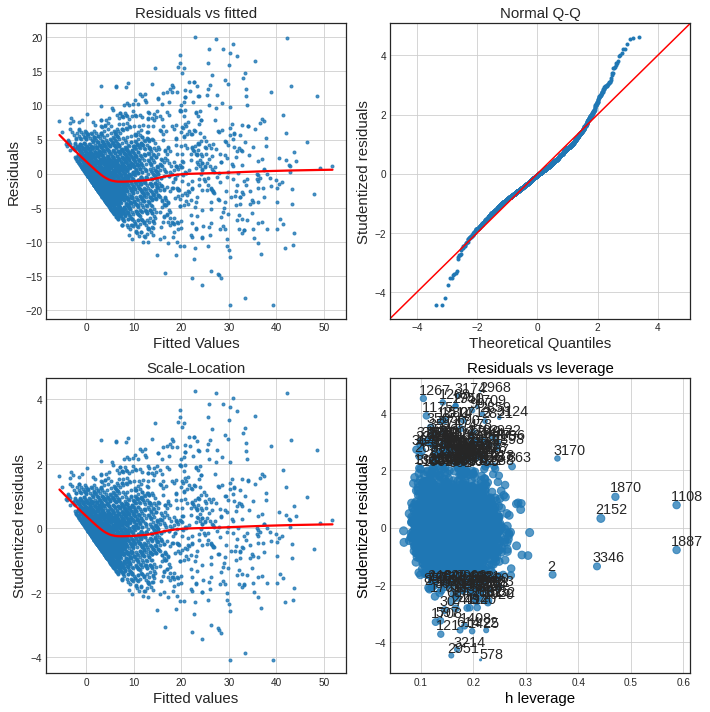

In [13]:
print("Diagnostic plots for the full model all data")
diagnostics_plots(mlm_fit_calm1_all_fm)
#print("Diagnostic plots for the reduced model all data")
#diagnostics_plots(mlm_fit_calm1_all_fm)

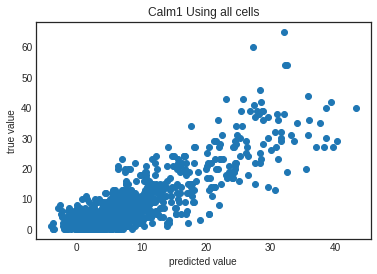

In [14]:
plt.scatter(x=calm1_all_fm_pred,y=test_calm1_all.Calm1)
plt.gca().update(dict(title="Calm1 Using all cells",xlabel="predicted value", ylabel="true value"))
plt.show()


## Calm1 Using Rod Bipolar

In [15]:
# creat calm1 data where CLASS == 'Rob Bipolar'
dataweek1_calm1=dataweek1[dataweek1['CLASS']=='Rod Bipolar']

In [16]:
# create the training and test data

train_calm1, test_calm1 = train_test_split(dataweek1_calm1, random_state=1)

In [17]:
# full model based on data without rob bipolar
mlm_fit_calm1_rob_fm = smf.ols(formula=lm_formula(train_calm1, 'Calm1'), data=train_calm1).fit()
print(mlm_fit_calm1_rob_fm.summary())

# works need explanation for the problem

                            OLS Regression Results                            
Dep. Variable:                  Calm1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Sun, 06 Mar 2022   Prob (F-statistic):                nan
Time:                        18:45:35   Log-Likelihood:                 10726.
No. Observations:                 375   AIC:                        -2.070e+04
Df Residuals:                       0   BIC:                        -1.923e+04
Df Model:                         374                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6344        inf          0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1376: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale


In [18]:
# predict using full model all data
calm1_rob_fm_pred = mlm_fit_calm1_rob_fm.predict(test_calm1)
#predict using reduced model all data
#calm1_rob_rm_pred = mlm_fit_calm1_all_rm.predict(test_calm1_all)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:695: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:695: RuntimeWarning: invalid value encountered in true_divide
  return self.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:708: RuntimeWarning: divide by zero encountered in true_divide
  cooks_d2 *= hii / (1 - hii)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1376: RuntimeWarning: in

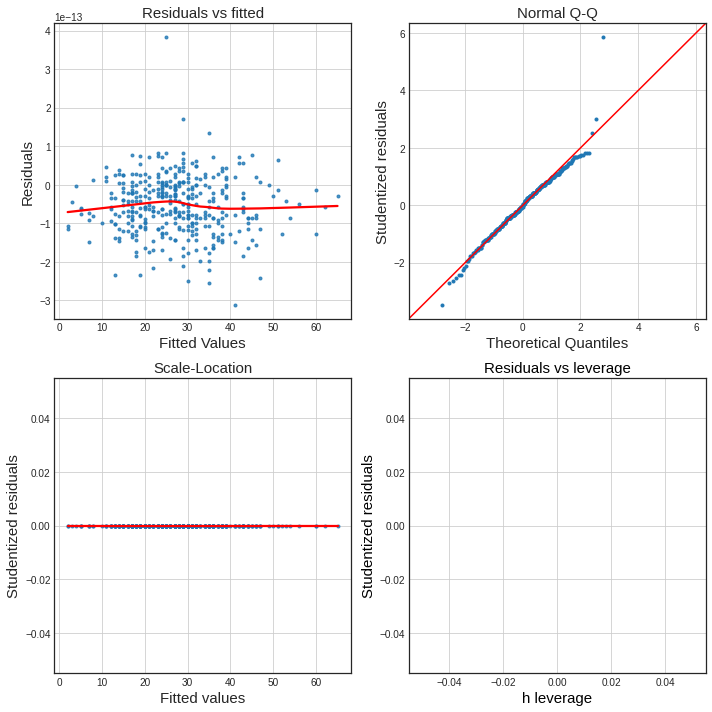

In [19]:
diagnostics_plots(mlm_fit_calm1_rob_fm)

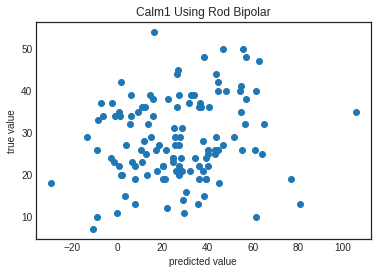

In [20]:
#compare the predicted and the true value with the subdataset
plt.scatter(x=calm1_rob_fm_pred,y=test_calm1.Calm1)
plt.gca().update(dict(title="Calm1 Using Rod Bipolar",xlabel="predicted value", ylabel="true value"))
plt.show()

## Malat1 Using all cells

In [21]:
# create the training and test data
train_malat1_all, test_malat1_all = train_test_split(dataweek1.iloc[:,:-1], random_state=1)

In [22]:
# multiple regres for based on all data 
mlm_fit_malat1_all_fm = smf.ols(formula=lm_formula(train_malat1_all, 'Malat1'), data=train_calm1_all).fit()
print(mlm_fit_calm1_all_fm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Calm1   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     21.88
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:46:20   Log-Likelihood:                -8059.0
No. Observations:                2793   AIC:                         1.702e+04
Df Residuals:                    2341   BIC:                         1.970e+04
Df Model:                         451                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1101      0.419      2.652

In [23]:
# predict using full model all data
malat1_all_fm_pred = mlm_fit_malat1_all_fm.predict(test_malat1_all)

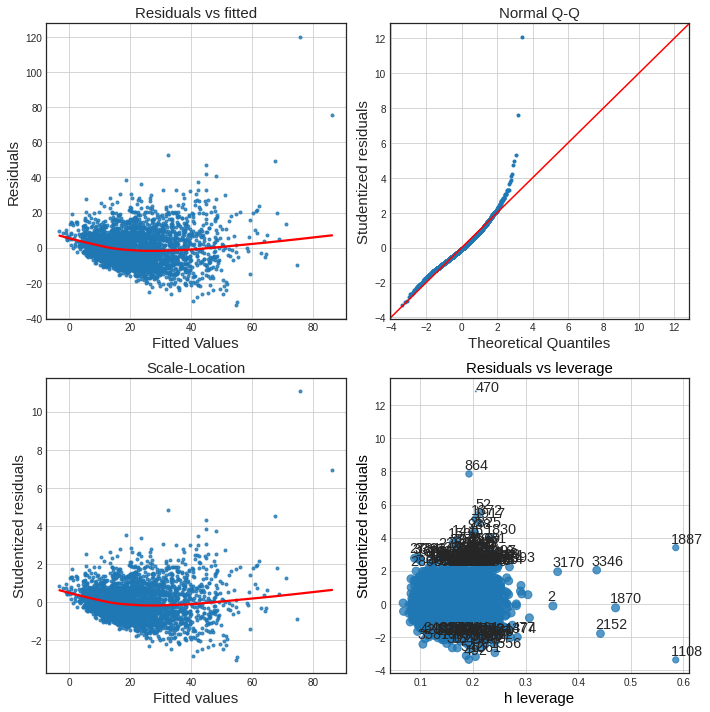

In [24]:
diagnostics_plots(mlm_fit_malat1_all_fm)

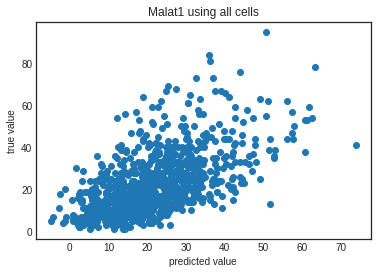

In [25]:
#compare the predicted and the true value with the subdataset
plt.scatter(x=malat1_all_fm_pred,y=test_malat1_all.Malat1)
plt.gca().update(dict(title='Malat1 using all cells',xlabel="predicted value", ylabel="true value"))
plt.show()

## Malat1 using Amacrine cells

In [26]:
# creat calm1 data where CLASS == 'Rob Bipolar'
dataweek1_malat1_amacrine = dataweek1[dataweek1['CLASS']=='Amacrine']

In [27]:
# create the training and test data

train_malat1_amacrine, test_malat1_amacrine = train_test_split(dataweek1_malat1_amacrine, random_state=1)

In [28]:
# multiple regres for based on all data 
mlm_fit_malat1_amacrine_fm = smf.ols(formula=lm_formula(train_malat1_amacrine, 'Malat1'), data=train_malat1_amacrine).fit()
print(mlm_fit_malat1_amacrine_fm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Malat1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Sun, 06 Mar 2022   Prob (F-statistic):                nan
Time:                        19:05:01   Log-Likelihood:                 2745.5
No. Observations:                  96   AIC:                            -5299.
Df Residuals:                       0   BIC:                            -5053.
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3065        inf          0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1376: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale


In [29]:
# predict using full model all data
malat1_amacrine_fm_pred = mlm_fit_malat1_amacrine_fm.predict(test_malat1_amacrine)


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:695: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:695: RuntimeWarning: invalid value encountered in true_divide
  return self.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:708: RuntimeWarning: divide by zero encountered in true_divide
  cooks_d2 *= hii / (1 - hii)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1376: RuntimeWarning: in

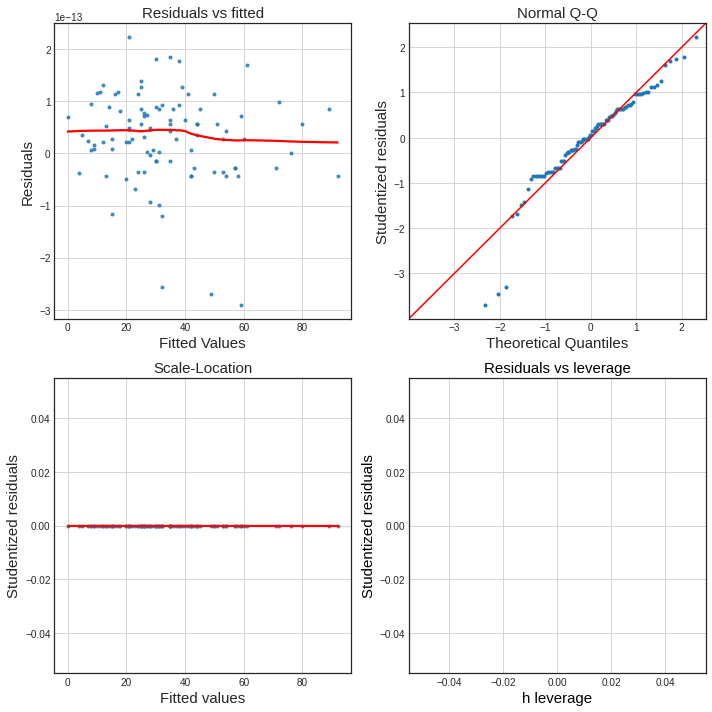

In [30]:
diagnostics_plots(mlm_fit_malat1_amacrine_fm)

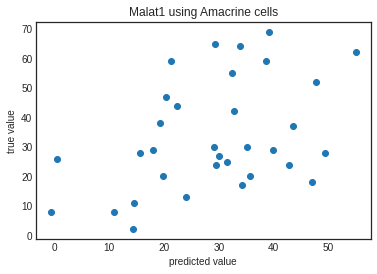

In [31]:
#compare the predicted and the true value with the subdataset
plt.scatter(x=malat1_amacrine_fm_pred,y=test_malat1_amacrine.Malat1)
plt.gca().update(dict(title="Malat1 using Amacrine cells", xlabel="predicted value", ylabel="true value"))
plt.show()

## Model Performance Evaluation

### Using MSE

In [32]:
# calm1 using all cells

calm1_all = mean_squared_error(test_calm1_all.Calm1, calm1_all_fm_pred)
calm1_all

27.113603413919503

In [33]:
# calm1 using Rod Bipolar
calm1_rod = mean_squared_error(test_calm1.Calm1, calm1_rob_fm_pred)

calm1_rod

507.22880447360535

In [34]:
# Malat1 using all cells
malat1_all = mean_squared_error(test_malat1_all.Malat1, malat1_all_fm_pred)
malat1_all

145.77796313236436

In [35]:
# Malat1 using amacrine
malat1_amacrine = mean_squared_error(test_malat1_amacrine.Malat1, malat1_amacrine_fm_pred)
malat1_amacrine


328.68328216069096

In [36]:
# Create mse dataframe
mse = [['calm1_all', calm1_all], ['calm1_rod', calm1_rod], ['malat1_all', malat1_all],\
       ['malat1_amacrine', malat1_amacrine]]
mse_df = pd.DataFrame(mse, columns=['Model', 'MSE'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Scatterplot of Model MSE from test data')

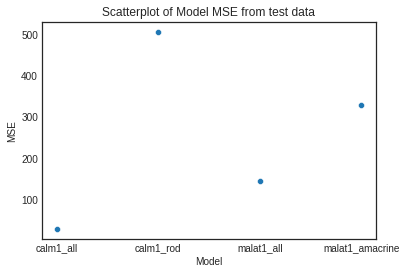

In [37]:
#plot mse
sns.scatterplot('Model', 'MSE', data=mse_df)
plt.title('Scatterplot of Model MSE from test data')

#MSE with different number of predictors

In [38]:
x_variables=list(dataweek1.columns)
x_variables.remove("Malat1")
x_variables.remove("CLASS")
para=[]
MSE_full=[]
MSE_sub=[]
for i in range(len(x_variables)):
    para.append(x_variables[i:])
print(len(para))
for i in range(len(para)):
  formula1='Malat1 ~' 
  formula1=formula1+"+".join(para[i])
  #predict with full dataframe
  lm_fit1_Malat1 = smf.ols(formula=formula1, data=train_malat1_all).fit()
  lm_fit1_Malat1_predict=lm_fit1_Malat1.predict(test_malat1_all)
  MSE_full.append(mean_squared_error(test_malat1_all.Malat1,lm_fit1_Malat1_predict))
  #predict with the sub dataframe
  lm_fit2_Malat1 = smf.ols(formula=formula1, data=train_malat1_amacrine).fit()
  lm_fit2_Malat1_predict=lm_fit2_Malat1.predict(test_malat1_amacrine)
  MSE_sub.append(mean_squared_error(test_malat1_amacrine.Malat1,lm_fit2_Malat1_predict))

451


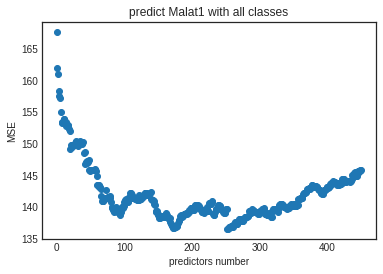

In [39]:
#if want to rerun the plot , please rerun the all code under this section
df=list(range(len(MSE_full)))
MSE_full.reverse()
plt.scatter(x=df,y=MSE_full)
plt.gca().update(dict( xlabel="predictors number", ylabel="MSE"))
plt.title("predict Malat1 with all classes")
plt.show()

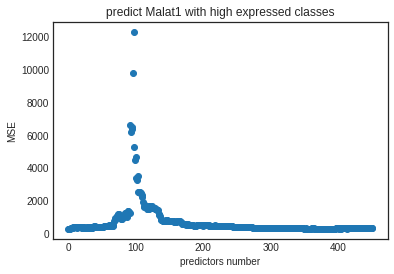

In [40]:
#if want to rerun the plot , please rerun the all code under this section
df=list(range(len(MSE_sub)))
MSE_sub.reverse()
plt.scatter(x=df,y=MSE_sub)
plt.gca().update(dict( xlabel="predictors number", ylabel="MSE"))
plt.title("predict Malat1 with high expressed classes")
plt.show()

## Data

In [41]:
#get the data
!git clone https://git.wur.nl/dijk097/ml2022_projectmbf.git data
#read csvfile
data = pd.read_csv('data/data_labeled_fixed.csv')
#remove - in name
data.columns = data.columns.str.replace("-", "")
dataweek1=data.drop(data.columns[-2],axis=1)


fatal: destination path 'data' already exists and is not an empty directory.


In [42]:
#dataweek1['class1'] = np.asarray([1 if x  == 'Cone Bipolar OFF' else 0 for x in dataweek1.CLASS])
dataweek1.columns


Index(['Acin1', 'Actb', 'Agap1', 'Ahi1', 'Akap11', 'Akap9', 'Aldoa', 'Aldoc',
       'Ankrd12', 'Anp32a',
       ...
       'Zranb2', 'mtCo1', 'mtCytb', 'mtNd1', 'mtNd2', 'mtNd4', 'mtNd5',
       'mtRnr1', 'mtRnr2', 'CLASS'],
      dtype='object', length=453)

In [43]:
dataweek1.CLASS == 'Rod Bipolar'

0       False
1       False
2       False
3       False
4       False
        ...  
3719    False
3720    False
3721    False
3722    False
3723    False
Name: CLASS, Length: 3724, dtype: bool

## Logistic regres. Cone Bipolar OFF vs. the res

In [44]:
# select data with higher expression, 
x = dataweek1.drop(["CLASS"],axis=1)
x = x[x.columns[x.mean() > 2]]
print(x.shape)



(3724, 22)


In [45]:
y = np.asarray([1 if x  == 'Cone Bipolar OFF' else 0 for x in dataweek1.CLASS])
print(y.shape)

(3724,)


In [46]:

# Split into training and test
x_train_cone_off, x_test_cone_off, y_train_cone_off, y_test_cone_off = train_test_split(x, y, random_state=1)
#print(y_test)


In [47]:
# run the model on training data
glm_model_cone_off = stats.GLM(y_train_cone_off, stats.add_constant(x_train_cone_off), family=stats.families.Binomial())
glm_fit_cone_off = glm_model_cone_off.fit()
print(glm_fit_cone_off.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2793
Model:                            GLM   Df Residuals:                     2770
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -623.92
Date:                Sun, 06 Mar 2022   Deviance:                       1247.8
Time:                        19:16:08   Pearson chi2:                 7.47e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8818      0.247      3.573      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [48]:
# Use on the test data
glm_probs_cone_off = glm_fit_cone_off.predict(stats.add_constant(x_test_cone_off))


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### Confusion Matrix

In [49]:
glm_preds_cone_off = np.asarray([1 if x > 0.5 else 0 for x in glm_probs_cone_off])
glm_preds_cone_off.shape

(931,)

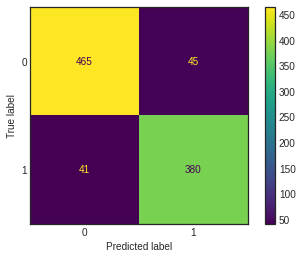

In [50]:
#conf_m = pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=glm_preds, labels=np.unique(y_test)).T)
#conf_m.index.name = 'Predicted'
#conf_m.columns.name = 'True'
#conf_m
cm_cone_off = confusion_matrix(y_test_cone_off, glm_preds_cone_off)
cm__cone_off_display = ConfusionMatrixDisplay(cm_cone_off).plot()

In [51]:
print(np.mean(glm_preds_cone_off == y_test_cone_off))
print(np.mean(glm_preds_cone_off != y_test_cone_off))

0.907626208378088
0.09237379162191192


## Cone Bipolar ON vs. the rest

In [52]:
y = np.asarray([1 if x  == 'Cone Bipolar ON' else 0 for x in dataweek1.CLASS])
print(y.shape)

(3724,)


In [53]:
# Split into training and test
x_train_cone_on, x_test_cone_on, y_train_cone_on, y_test_cone_on = train_test_split(x, y, random_state=1)
#print(y_test)


In [54]:
# run the model on training data
glm_model_cone_on = stats.GLM(y_train_cone_on, stats.add_constant(x_train_cone_on), family=stats.families.Binomial())
glm_fit_cone_on = glm_model_cone_on.fit()
print(glm_fit_cone_on.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2793
Model:                            GLM   Df Residuals:                     2770
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -540.56
Date:                Sun, 06 Mar 2022   Deviance:                       1081.1
Time:                        19:16:08   Pearson chi2:                 3.70e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8690      0.270     -3.215      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [55]:
# Use on the test data
glm_probs_cone_on = glm_fit_cone_on.predict(stats.add_constant(x_test_cone_on))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Confusion matrix

In [56]:
glm_preds_cone_on = np.asarray([1 if x > 0.5 else 0 for x in glm_probs_cone_on])
glm_preds_cone_on.shape

(931,)

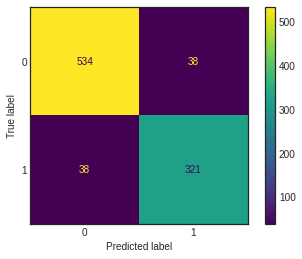

In [57]:
#conf_m = pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=glm_preds, labels=np.unique(y_test)).T)
#conf_m.index.name = 'Predicted'
#conf_m.columns.name = 'True'
#conf_m
cm_cone_on = confusion_matrix(y_test_cone_on, glm_preds_cone_on)
cm__cone_on_display = ConfusionMatrixDisplay(cm_cone_on).plot()

In [58]:
print(np.mean(glm_preds_cone_on == y_test_cone_on))
print(np.mean(glm_preds_cone_on != y_test_cone_on))

0.9183673469387755
0.08163265306122448


## Amacrine vs. the rest

In [59]:
y = np.asarray([1 if x  == 'Amacrine' else 0 for x in dataweek1.CLASS])

In [60]:
# Split into training and test
x_train_amacrine, x_test_amacrine, y_train_amacrine, y_test_amacrine = train_test_split(x, y, random_state=1)
#print(y_test)

In [61]:
# run the model on training data
glm_model_amacrine = stats.GLM(y_train_amacrine, stats.add_constant(x_train_amacrine), family=stats.families.Binomial())
glm_fit_amacrine = glm_model_amacrine.fit()
print(glm_fit_amacrine.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2793
Model:                            GLM   Df Residuals:                     2770
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -110.73
Date:                Sun, 06 Mar 2022   Deviance:                       221.46
Time:                        19:16:09   Pearson chi2:                 6.40e+03
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9411      0.659     -2.944      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [62]:
# Use on the test data
glm_probs_amacrine = glm_fit_amacrine.predict(stats.add_constant(x_test_amacrine))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [63]:
glm_preds_amacrine = np.asarray([1 if x > 0.5 else 0 for x in glm_probs_amacrine])
glm_preds_amacrine.shape

(931,)

#### Confusion Matrix

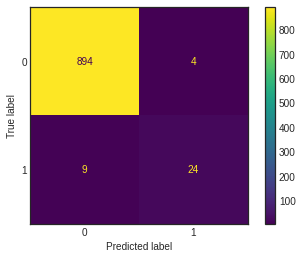

In [64]:
#conf_m = pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=glm_preds, labels=np.unique(y_test)).T)
#conf_m.index.name = 'Predicted'
#conf_m.columns.name = 'True'
#conf_m
cm_amacrine = confusion_matrix(y_test_amacrine, glm_preds_amacrine)
cm_display_amacrine = ConfusionMatrixDisplay(cm_amacrine).plot()

In [65]:
print(np.mean(glm_preds_amacrine == y_test_amacrine))
print(np.mean(glm_preds_amacrine != y_test_amacrine))

0.9860365198711063
0.013963480128893663


##  Rod Bipolar vs. the rest

In [66]:
y = np.asarray([1 if x  == 'Rod Bipolar' else 0 for x in dataweek1.CLASS])


In [67]:
# Split into training and test
x_train_rod, x_test_rod, y_train_rod, y_test_rod = train_test_split(x, y, random_state=1)
#print(y_test)

In [68]:
# run the model on training data
glm_model_rod = stats.GLM(y_train_rod, stats.add_constant(x_train_rod), family=stats.families.Binomial())
glm_fit_rod = glm_model_rod.fit()
print(glm_fit_rod.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2793
Model:                            GLM   Df Residuals:                     2770
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -69.364
Date:                Sun, 06 Mar 2022   Deviance:                       138.73
Time:                        19:16:10   Pearson chi2:                     476.
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3190      0.931     -5.712      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [69]:
# Use on the test data
glm_probs_rod = glm_fit_rod.predict(stats.add_constant(x_test_rod))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [70]:
glm_preds_rod = np.asarray([1 if x > 0.5 else 0 for x in glm_probs_rod])
glm_preds_rod.shape

(931,)

#### Confusion Matrix

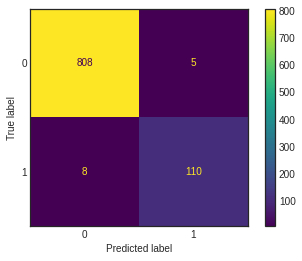

In [71]:
#conf_m = pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=glm_preds, labels=np.unique(y_test)).T)
#conf_m.index.name = 'Predicted'
#conf_m.columns.name = 'True'
#conf_m
cm_rod = confusion_matrix(y_test_rod, glm_preds_rod)
cm_display_rod = ConfusionMatrixDisplay(cm_rod).plot()

In [72]:
print(np.mean(glm_preds_rod == y_test_rod))
print(np.mean(glm_preds_rod != y_test_rod))

0.9860365198711063
0.013963480128893663


## Models Predictive Performance

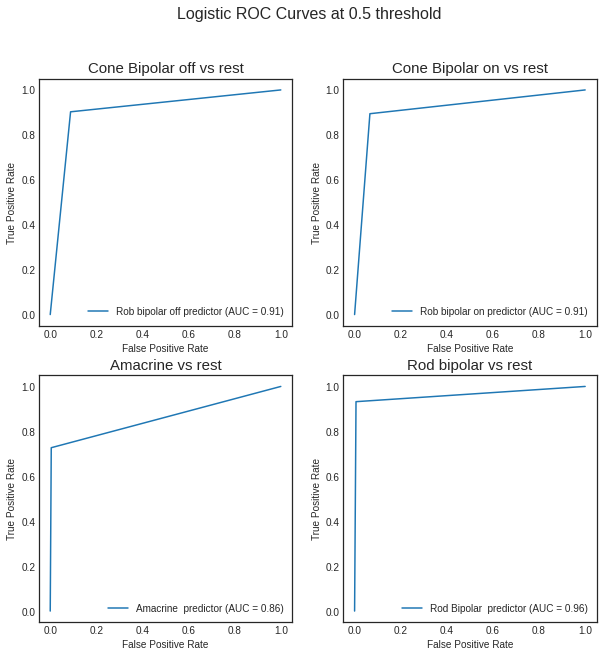

In [73]:

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

#Cone bipolar off
fpr_cone_off, tpr_cone_off, _ = roc_curve(y_test_cone_off,  glm_preds_cone_off)
auc_cone_off = roc_auc_score(y_test_cone_off, glm_preds_cone_off)
RocCurveDisplay(fpr=fpr_cone_off, tpr=tpr_cone_off,  roc_auc=auc_cone_off,estimator_name='Rob bipolar off predictor').plot(ax=axes[0,0])
axes[0, 0].set_title("Cone Bipolar off vs rest", fontsize=15)

# cone bipolar on
fpr_cone_on, tpr_cone_on, _ = roc_curve(y_test_cone_on,  glm_preds_cone_on)
auc_cone_on = roc_auc_score(y_test_cone_on, glm_preds_cone_on)
RocCurveDisplay(fpr=fpr_cone_on, tpr=tpr_cone_on,  roc_auc=auc_cone_on,estimator_name='Rob bipolar on predictor').plot(ax=axes[0,1])
axes[0, 1].set_title("Cone Bipolar on vs rest", fontsize=15)

# amcrine
fpr_amacrine, tpr_amacrine, _ = roc_curve(y_test_amacrine,  glm_preds_amacrine)
auc_amacrine = roc_auc_score(y_test_amacrine, glm_preds_amacrine)
RocCurveDisplay(fpr=fpr_amacrine, tpr=tpr_amacrine,  roc_auc=auc_amacrine,estimator_name='Amacrine  predictor').plot(ax=axes[1,0])
axes[1, 0].set_title("Amacrine vs rest", fontsize=15)

# Rod bipolar
fpr_rod, tpr_rod, _ = roc_curve(y_test_rod,  glm_preds_rod)
auc_rod = roc_auc_score(y_test_rod, glm_preds_rod)
RocCurveDisplay(fpr=fpr_rod, tpr=tpr_rod,  roc_auc=auc_rod,estimator_name='Rod Bipolar  predictor').plot(ax=axes[1,1])
axes[1, 1].set_title("Rod bipolar vs rest", fontsize=15)
fig.suptitle('Logistic ROC Curves at 0.5 threshold', fontsize=16)


plt.show()

#KNN

In [74]:
dataweek1["Cone Bipolar OFF"]=np.where(dataweek1['CLASS'] =="Cone Bipolar OFF", 1, 0)
dataweek1["Cone Bipolar ON"]=np.where(dataweek1['CLASS'] =="Cone Bipolar ON", 1, 0)
dataweek1["Amacrine"]=np.where(dataweek1['CLASS'] =="Amacrine", 1, 0)
dataweek1["Rod Bipolar"]=np.where(dataweek1['CLASS'] =="Rod Bipolar", 1, 0)
x = dataweek1.drop(["CLASS"],axis=1)
x = x[x.columns[x.mean() > 2]]
x["Cone Bipolar OFF"]=dataweek1["Cone Bipolar OFF"]
x["Cone Bipolar ON"]=dataweek1["Cone Bipolar ON"]
x["Amacrine"]=dataweek1["Amacrine"]
x['Rod Bipolar']=dataweek1["Rod Bipolar"]
titles = ["KNN: Cone Bipolar off  vs rest confusion matrix",\
          "KNN: cone Bipolar on vs rest confusion matrix",\
          "KNN: Amacrine vs rest confusion matrix",\
          "KNN: Rod Bipolar  vs rest confusion matrix"]

In [75]:
titles[0]

'KNN: Cone Bipolar off  vs rest confusion matrix'

##def the kNN function

In [76]:
def K_nearest (i, X_train, y_train,X_test,y_test, title):
  knn_model = KNeighborsClassifier(n_neighbors=i)
  knn_fit = knn_model.fit(X_train, y_train)

  # Predict the response on the test data using the fitted LDA model
  y_pred = knn_fit.predict(X_test)

  # Put in a data frame for printing
  y_pred_df = X_test.copy()
  y_pred_df['y_pred'] = y_pred
  y_pred_df

  #predict with the x_test data#
  y_pred_propa = knn_fit.predict_proba(X_test)
  y_pred = knn_fit.predict(X_test)

  # Print both using a data frame
  pd.DataFrame({knn_fit.classes_[0]: y_pred_propa[:, 0], 
                knn_fit.classes_[1]: y_pred_propa[:, 1], 
                'Prediction': y_pred})
  # Compare the predicted and true labels
  y_pred = knn_fit.predict(X_test)
  y_compare = y_pred == y_test

  # Print the accuracy
  accuracy = y_compare.mean()
  print('\nThe accuracy: ', accuracy)
  ac_list.append(accuracy)
  k.append(i)
  # Put in a pandas data frame for printing 
  conf_m = confusion_matrix(y_test, y_pred, labels=knn_fit.classes_)
  conf_pd = pd.DataFrame(conf_m,index=knn_fit.classes_, columns=knn_fit.classes_)
  conf_pd.index.name = 'True'
  conf_pd.columns.name = 'Predicted'
  print(conf_pd)
  conf_m_display = ConfusionMatrixDisplay(conf_m,).plot()
  plt.title(f"{title}")
  plt.show()
  #caclulate sensitivity
  TP=conf_pd[1][1]
  FN=conf_pd[0][1]
  TN=conf_pd[0][0]
  FP=conf_pd[1][0]
  print("sensitivity{}".format(TP/(TP+FN)))
  print("Specificity{}".format(TN/(TN+FP)))
  sensitivity.append(TP/(TP+FN))
  Specificity.append(TN/(TN+FP))

In [77]:
train, test = train_test_split(x, random_state=1)
X_train=train[train.columns[:-4]]
X_test=test[test.columns[:-4]]
y_train_Cone_Bipolar_OFF=train["Cone Bipolar OFF"]
y_test_Cone_Bipolar_OFF=test["Cone Bipolar OFF"]

y_train_Cone_Bipolar_ON=train["Cone Bipolar ON"]
y_test_Cone_Bipolar_ON=test["Cone Bipolar ON"]

y_train_Amacrine=train["Amacrine"]
y_test_Amacrine=test["Amacrine"]

y_train_Rod_Bipolar=train["Rod Bipolar"]
y_test_Rod_Bipolar=test["Rod Bipolar"]

*******Cone_Bipolar_OFF*********

The accuracy:  0.8839957035445757
Predicted    0    1
True               
0          447   63
1           45  376


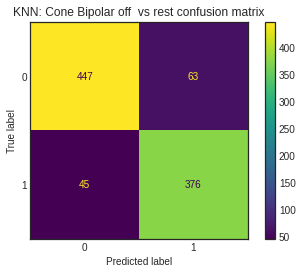

sensitivity0.8931116389548693
Specificity0.8764705882352941
*******Cone_Bipolar_ON********

The accuracy:  0.8958109559613319
Predicted    0    1
True               
0          531   41
1           56  303


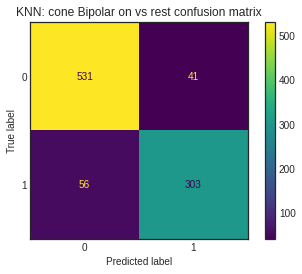

sensitivity0.8440111420612814
Specificity0.9283216783216783
***********Amacrine***********

The accuracy:  0.9688506981740065
Predicted    0  1
True             
0          894  4
1           25  8


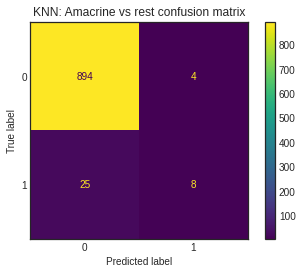

sensitivity0.24242424242424243
Specificity0.9955456570155902
*********Rod_Bipolar**********

The accuracy:  0.9903329752953813
Predicted    0    1
True               
0          807    6
1            3  115


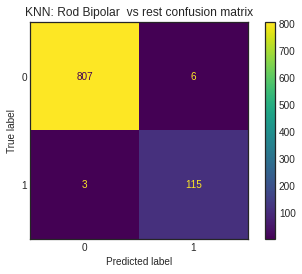

sensitivity0.9745762711864406
Specificity0.992619926199262


In [78]:
ac_list=[]
k=[]
sensitivity=[] #TP / (TP+FN)
Specificity=[] #TN / (TN+FP)

print("*******Cone_Bipolar_OFF*********")
K_nearest (3, X_train, y_train_Cone_Bipolar_OFF,X_test,y_test_Cone_Bipolar_OFF, titles[0])

print("*******Cone_Bipolar_ON********")
K_nearest (3, X_train, y_train_Cone_Bipolar_ON,X_test,y_test_Cone_Bipolar_ON, titles[1])

print("***********Amacrine***********")
K_nearest (3, X_train, y_train_Amacrine,X_test,y_test_Amacrine, titles[2])

print("*********Rod_Bipolar**********")
K_nearest (3, X_train, y_train_Rod_Bipolar,X_test,y_test_Rod_Bipolar, titles[3])


##try with different k 

In [79]:

ac_list=[]
k=[]
sensitivity=[] #TP / (TP+FN)
Specificity=[] #TN / (TN+FP)
for i in range(1,201):
  K_nearest (i, X_train, y_train_Amacrine,X_test,y_test_Amacrine, titles[2])

Output hidden; open in https://colab.research.google.com to view.

##Accuracy,Sensitivity and Specificity

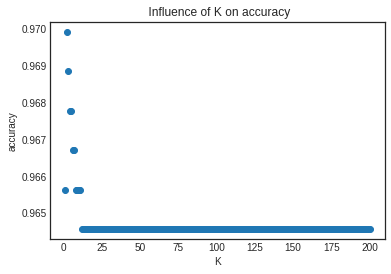

In [80]:
plt.scatter(x=k,y=ac_list)
plt.xlabel("K")
plt.ylabel("accuracy")
plt.title(" Influence of K on accuracy")
plt.show()

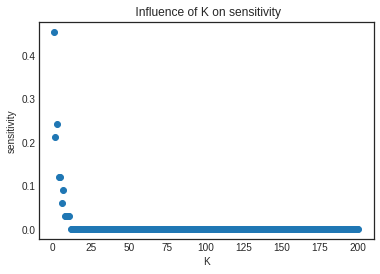

In [81]:
#sensitivity
plt.scatter(x=k,y=sensitivity)
plt.xlabel("K")
plt.ylabel("sensitivity")
plt.title(" Influence of K on sensitivity")
plt.show()

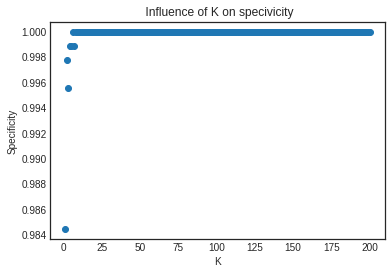

In [82]:
#Specificity
plt.scatter(x=k,y=Specificity)
plt.xlabel("K")
plt.ylabel("Specificity")
plt.title(" Influence of K on specivicity")
plt.show()

#Advanced question

In [102]:
columns_name=list(dataweek1.columns)[:-5]
#check number of classes
#'Cone Bipolar ON' :0, 'Cone Bipolar OFF' :1, 'Rod Bipolar' :2, 'Amacrine' :3
dataweek1["CLASS"].unique()
y_full=dataweek1
y_full["CLASS"] = y_full["CLASS"].map({'Cone Bipolar ON' :0, 'Cone Bipolar OFF' :1, 'Rod Bipolar' :2, 'Amacrine' :3}).astype(int)

In [103]:
y_full["CLASS"].unique()

array([0, 1, 2, 3])

In [104]:
x=dataweek1[columns_name].values
y=y_full["CLASS"].values
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1,test_size=0.25)
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Predicted    0    1    2   3
True                        
0          340   14    5   0
1           14  403    1   3
2            1    0  117   0
3            1    3    1  28


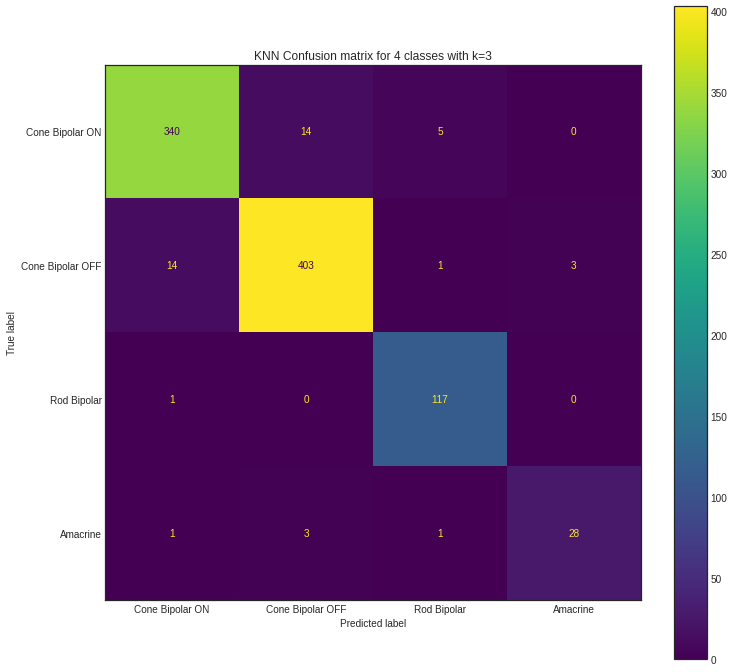

In [105]:
ypred_test=knn.predict(X_test)
conf_m = confusion_matrix(y_test, ypred_test, labels=knn.classes_)
conf_pd = pd.DataFrame(conf_m,index=knn.classes_, columns=knn.classes_)
conf_pd.index.name = 'True'
conf_pd.columns.name = 'Predicted'
print(conf_pd)
fig, ax = plt.subplots(figsize=(12, 12))
conf_m_display = ConfusionMatrixDisplay(conf_m,display_labels=['Cone Bipolar ON', 'Cone Bipolar OFF', 'Rod Bipolar', 'Amacrine']).plot(ax=ax)
plt.title("KNN Confusion matrix for 4 classes with k=3")
plt.show()

In [106]:
print("accuracy: {}".format(accuracy_score(y_test, ypred_test)))

accuracy: 0.9538131041890441


##predict the unlabeled data

In [107]:
#import data
data_unlabeled=pd.read_csv("./data/data_unlabeled_fixed2022.csv")
#remove - in name
data_unlabeled.columns = data_unlabeled.columns.str.replace("-", "")

In [108]:
x_unlabel=data_unlabeled[columns_name].values
y_unlabel=knn.predict(x_unlabel)

In [109]:
#'Cone Bipolar ON' :0, 'Cone Bipolar OFF' :1, 'Rod Bipolar' :2, 'Amacrine' :3
print('the number of class Cone Bipolar ON ={}'.format(np.sum(y_unlabel==0)))
print('the number of class Cone Bipolar OFF ={}'.format(np.sum(y_unlabel==1)))
print('the number of class Rod Bipolar ={}'.format(np.sum(y_unlabel==2)))
print('the number of class Amacrine ={}'.format(np.sum(y_unlabel==3)))

the number of class Cone Bipolar ON =1225
the number of class Cone Bipolar OFF =1617
the number of class Rod Bipolar =1724
the number of class Amacrine =335
